In [15]:
!pip install --upgrade scikit-learn

  Using cached scikit_learn-1.2.2-cp310-cp310-win_amd64.whl (8.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.1
    Uninstalling scikit-learn-1.1.1:
      Successfully uninstalled scikit-learn-1.1.1



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\ELCOT\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tabulate import tabulate
import time
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Distributions
import scipy

import warnings
warnings.filterwarnings("ignore")
import math
import time
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, confusion_matrix, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline
from matplotlib.tri import Triangulation
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import LSTM, Dense
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.semi_supervised import LabelPropagation
import joblib
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression

In [2]:
df1 = pd.read_csv('student-mat.csv')
df2 = pd.read_csv('student-por.csv')
df3 = pd.concat([df1, df2])
df3.to_csv('student.csv', index=True)

In [3]:
data = pd.read_csv("student.csv", sep = ";")
data.head()

,",school",sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,"0,""GP","F""""",18,"U""""","GT3""""","A""""",4,4,"at_home""""","teacher""""",...,4,3,4,1,1,3,6,"5""""","6""""","6"""
1,"1,""GP","F""""",17,"U""""","GT3""""","T""""",1,1,"at_home""""","other""""",...,5,3,3,1,1,3,4,"5""""","5""""","6"""
2,"2,""GP","F""""",15,"U""""","LE3""""","T""""",1,1,"at_home""""","other""""",...,4,3,2,2,3,3,10,"7""""","8""""","10"""
3,"3,""GP","F""""",15,"U""""","GT3""""","T""""",4,2,"health""""","services""""",...,3,2,2,1,1,5,2,"15""""","14""""","15"""
4,"4,""GP","F""""",16,"U""""","GT3""""","T""""",3,3,"other""""","other""""",...,4,3,2,1,2,5,4,"6""""","10""""","10"""


In [4]:
data.shape

(1044, 33)

In [5]:
data.columns

Index([',school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
data['Fjob']

0        teacher""
1          other""
2          other""
3       services""
4          other""
           ...    
1039       other""
1040    services""
1041       other""
1042    services""
1043       other""
Name: Fjob, Length: 1044, dtype: object

In [7]:
data1 = data.replace('"', '', regex=True)

In [8]:
data1.head()

,",school",sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,"0,GP",F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,"1,GP",F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,"2,GP",F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,"3,GP",F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,"4,GP",F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
data1['age'] = pd.to_numeric(data1['age'], errors='coerce')
data1['Medu'] = pd.to_numeric(data1['Medu'], errors='coerce')
data1['Fedu'] = pd.to_numeric(data1['Fedu'], errors='coerce')
data1['traveltime'] = pd.to_numeric(data1['traveltime'], errors='coerce')
data1['studytime'] = pd.to_numeric(data1['studytime'], errors='coerce')
data1['failures'] = pd.to_numeric(data1['failures'], errors='coerce')
data1['famrel'] = pd.to_numeric(data1['famrel'], errors='coerce')
data1['freetime'] = pd.to_numeric(data1['freetime'], errors='coerce')
data1['goout'] = pd.to_numeric(data1['goout'], errors='coerce')
data1['Dalc'] = pd.to_numeric(data1['Dalc'], errors='coerce')
data1['Walc'] = pd.to_numeric(data1['Walc'], errors='coerce')
data1['health'] = pd.to_numeric(data1['health'], errors='coerce')
data1['absences'] = pd.to_numeric(data1['absences'], errors='coerce')
data1['G1'] = pd.to_numeric(data1['G1'], errors='coerce')
data1['G2'] = pd.to_numeric(data1['G2'], errors='coerce')
data1['G3'] = pd.to_numeric(data1['G3'], errors='coerce')

In [10]:
data1[['S.No', 'School']] = data1[',school'].str.split(',', expand=True)

In [11]:
def classify_grade(score):
    if score < 10:
        return 0
    else:
        return 1
# here 0 - fail and 1 - pass

In [12]:
#data1['G1_class2'] = data1['G1'].apply(classify_grade)
#data1['G2_class2'] = data1['G2'].apply(classify_grade)
data1['G3_class2'] = data1['G3'].apply(classify_grade)

In [13]:
data1.to_csv('student.csv', index=False)

In [14]:
# Create a LabelEncoder object
le = preprocessing.LabelEncoder()

# Encode the categorical columns
for column in data1.select_dtypes(include=["object"]):
    data1[column] = le.fit_transform(data1[column])

# Save the encoded data to a new CSV file
#df.to_csv("encoded_data.csv", index=False)


In [15]:
data1['sex']

0       0
1       0
2       0
3       0
4       0
       ..
1039    0
1040    0
1041    0
1042    1
1043    1
Name: sex, Length: 1044, dtype: int32

In [16]:
class_counts = data1['G3_class2'].value_counts().sort_index()

for class_value, count in class_counts.items():
    print(f"Class {class_value}: {count}")

Class 0: 230
Class 1: 814


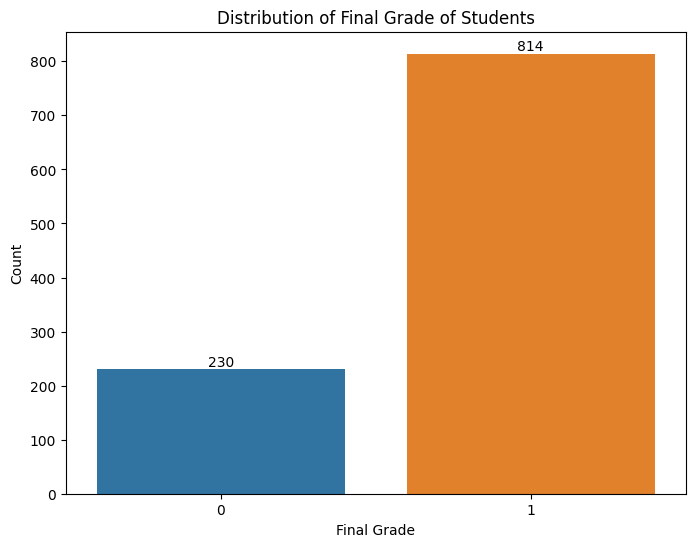

In [17]:
class_counts = data1['G3_class2'].value_counts().sort_index()

# Plot the class distribution using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.title('Distribution of Final Grade of Students')

for x, y in zip(range(len(class_counts)), class_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.show()

# **0-9 - Fail (Class 0)**
# **10-20 - Pass (Class 1)**

In [18]:
# drop the school and grade columns
#data1 = data1.drop(['School', 'G1', 'G2'], axis='columns')
#data1 = data1.drop(['School', ',school', 'S.No', 'G1', 'G2', 'G3'], axis='columns')
#data2 = data2.drop(['address', 'sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'G3'], axis='columns')

In [18]:
data1 = data1.drop(['School', ',school', 'S.No'], axis='columns')

In [37]:
#data1 = data1.drop(['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'], axis='columns')

In [19]:
data1.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'G3_class2'],
      dtype='object')

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import f1_score, precision_score

Xvar = data1.drop('G3', axis=1)
yvar = data1['G3']

k_best = 10 
skb = SelectKBest(score_func=f_classif, k=k_best)
Xnewvar = skb.fit_transform(Xvar, yvar)

scores = skb.scores_
features = Xvar.columns
selected_features = Xvar.columns[skb.get_support()]
print('Feature scores:')
for i in range(len(features)):
    print(features[i], ':', scores[i])
print('\nSelected features:')
print(selected_features)

Feature scores:
sex : 0.787594240441863
age : 2.3074619917743657
address : 1.663560645187305
famsize : 1.1394522340829532
Pstatus : 0.5241325552518998
Medu : 4.649272061187352
Fedu : 3.458793927913265
Mjob : 1.9398646764993202
Fjob : 1.2760744284936552
reason : 1.8470692178349923
guardian : 1.3058410512575123
traveltime : 2.2292313317179593
studytime : 2.7612328529408674
failures : 16.120277196840355
schoolsup : 2.487584163665422
famsup : 0.9917756196980875
paid : 1.5470836705345112
activities : 1.3213633771673532
nursery : 0.6660455513552567
higher : 5.0750169288928735
internet : 1.355035516515112
romantic : 1.720210012264435
famrel : 0.6332834799485477
freetime : 1.3141306814289118
goout : 1.6386187635232268
Dalc : 3.381105620964391
Walc : 2.8288741540926248
health : 1.6394903368501084
absences : 6.055203354787886
G1 : 208.8490530098885
G2 : 391.96090988392575
G3_class2 : inf

Selected features:
Index(['Medu', 'Fedu', 'failures', 'higher', 'Dalc', 'Walc', 'absences', 'G1',
       'G2

In [20]:
# splitting the data into training and testing data (75% and 25%)
# we mention the random state to achieve the same split everytime we run the code
X_train, X_test, y_train, y_test = train_test_split(data1, data1['G3_class2'], test_size = 0.20, random_state=12345)

In [21]:
X_train.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_class2
794,0,18,1,0,1,3,2,2,3,2,...,4,3,2,3,1,4,14,16,17,1
435,0,16,1,1,1,2,2,2,2,1,...,3,3,1,2,3,16,11,11,10,1
199,0,16,1,1,1,4,4,4,4,3,...,5,2,1,2,3,0,9,9,10,1
526,0,18,1,0,1,2,1,3,2,3,...,4,5,1,3,5,10,10,9,8,0
554,0,15,1,0,1,1,2,0,2,0,...,3,2,1,1,5,6,13,12,13,1


In [22]:
# Create an instance of RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Print the class distribution after oversampling
class_counts = pd.Series(y_train_resampled).value_counts()
print(class_counts)

G3_class2
1    646
0    646
Name: count, dtype: int64


In [23]:
X_train_resampled.shape

(1292, 33)

In [24]:
from sklearn.preprocessing import StandardScaler
scalervar = StandardScaler()
X_train_resampled = scalervar.fit_transform(X_train_resampled)
X_test = scalervar.fit_transform(X_test)

In [29]:
data1.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'G3_class2'],
      dtype='object')

In [36]:
from statsmodels.formula.api import ols
# Define the formula for the factorial design
formula = 'G3_class2 ~ sex + age + address + famsize + Pstatus + Medu + Fedu + Mjob + Fjob + reason + guardian + traveltime + studytime + failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences'

# Fit the linear model using the formula and the data
model = ols(formula, data=data1).fit()

# Perform an analysis of variance (ANOVA)
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                  sum_sq      df             F        PR(>F)
sex         6.326339e-03     1.0  4.400510e-02  8.338863e-01
age         1.359564e-03     1.0  9.456930e-03  9.225497e-01
address     4.449198e-01     1.0  3.094798e+00  7.884445e-02
famsize     9.758085e-02     1.0  6.787584e-01  4.102083e-01
Pstatus     1.534460e-01     1.0  1.067348e+00  3.017915e-01
Medu        4.471222e-02     1.0  3.110118e-01  5.771831e-01
Fedu        9.463546e-02     1.0  6.582706e-01  4.173615e-01
Mjob        1.217292e-02     1.0  8.467307e-02  7.711213e-01
Fjob        9.882190e-02     1.0  6.873909e-01  4.072484e-01
reason      3.021770e-01     1.0  2.101900e+00  1.474254e-01
guardian    1.497327e-02     1.0  1.041519e-01  7.469695e-01
traveltime  1.942369e-01     1.0  1.351084e+00  2.453622e-01
studytime   2.403366e-01     1.0  1.671747e+00  1.963192e-01
failures    1.289922e+01     1.0  8.972511e+01  1.861395e-20
schoolsup   4.030924e-01     1.0  2.803853e+00  9.434647e-02
famsup      2.600593e-02

In [37]:
print("R-squared:", model.rsquared)

R-squared: 0.1871028117869009


In [25]:
def execmod(rpmdl, X_train_resampled, y_train_resampled, X_test, y_test, verbose=True):
    tmini = time.time()
    if verbose == False:
        rpmdl.fit(X_train_resampled, y_train_resampled, verbose=0)
    else:
        rpmdl.fit(X_train_resampled, y_train_resampled)
    y_pred = rpmdl.predict(X_test)
    valacc = accuracy_score(y_test, y_pred)
    valauc = roc_auc_score(y_test, y_pred) 
    valmse = mean_squared_error(y_test, y_pred)
    valmae = mean_absolute_error(y_test, y_pred)
    valrmse = np.sqrt(valmse)
    valexectim = time.time() - tmini
    print("Accuracy = {}".format(valacc))
    print("ROC Area under Curve = {}".format(valauc))
    print("MAE Value = {}".format(valmae))
    print("RMSE Value = {}".format(valrmse))
    print("Execution Time = {}".format(valexectim))
    print(classification_report(y_test, y_pred, digits=6))
    
   
   # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plotting the confusion matrix
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    #plt.xticks([])
    #plt.yticks([])
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Print the values inside the matrix
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.show()
    
    return rpmdl, valacc, valauc, valmae, valrmse, valexectim


Accuracy = 0.8277511961722488
ROC Area under Curve = 0.8928571428571428
MAE Value = 0.1722488038277512
RMSE Value = 0.4150286783196448
Execution Time = 0.3919525146484375
              precision    recall  f1-score   support

           0   0.532468  1.000000  0.694915        41
           1   1.000000  0.785714  0.880000       168

    accuracy                       0.827751       209
   macro avg   0.766234  0.892857  0.787458       209
weighted avg   0.908283  0.827751  0.843692       209



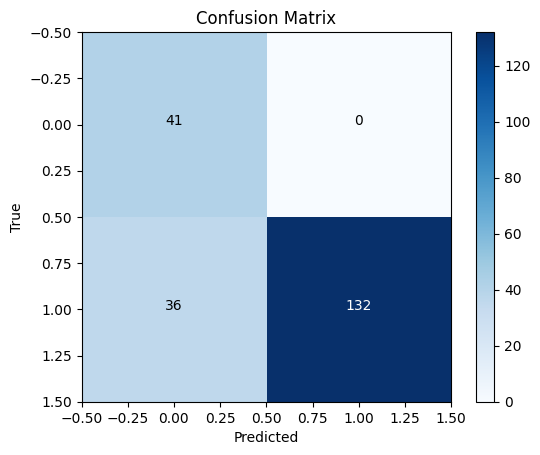

In [26]:
from sklearn.linear_model import LogisticRegression
logrpmdl = LogisticRegression(penalty='l2', C=0.001)
logrpmdl, logvalacc, logvalauc, logvalmae, logvalrmse, logvalexectim = execmod(logrpmdl, X_train_resampled, y_train_resampled, X_test, y_test)

Accuracy = 0.8373205741626795
ROC Area under Curve = 0.8988095238095238
MAE Value = 0.16267942583732056
RMSE Value = 0.4033353763771789
Execution Time = 1.044677972793579
              precision    recall  f1-score   support

           0   0.546667  1.000000  0.706897        41
           1   1.000000  0.797619  0.887417       168

    accuracy                       0.837321       209
   macro avg   0.773333  0.898810  0.797157       209
weighted avg   0.911069  0.837321  0.852004       209



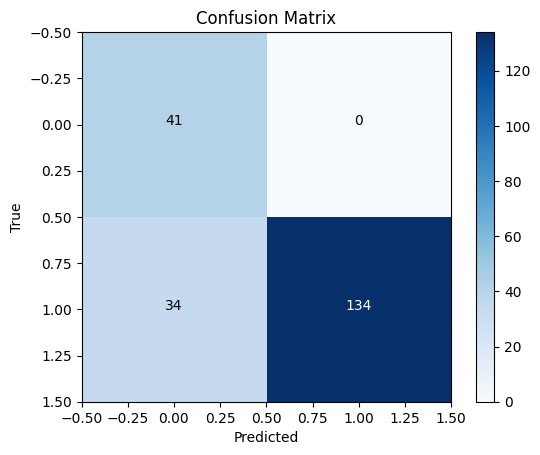

In [65]:
# RFC
from sklearn.ensemble import RandomForestClassifier

rfvalpara = {'bootstrap': True,
             'max_depth': 36,
             'max_features': 'auto',
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 200,
             'random_state': 12345}

    
rfrpmdl = RandomForestClassifier(**rfvalpara)
rfrpmdl, rfvalacc, rfvalauc, rfvalmae, rfvalrmse, rfvalexectim = execmod(rfrpmdl, X_train_resampled, y_train_resampled, X_test, y_test)

Accuracy = 0.7511961722488039
ROC Area under Curve = 0.8452380952380952
MAE Value = 0.24880382775119617
RMSE Value = 0.498802393489843
Execution Time = 0.6523995399475098
              precision    recall  f1-score   support

           0   0.440860  1.000000  0.611940        41
           1   1.000000  0.690476  0.816901       168

    accuracy                       0.751196       209
   macro avg   0.720430  0.845238  0.714421       209
weighted avg   0.890312  0.751196  0.776694       209



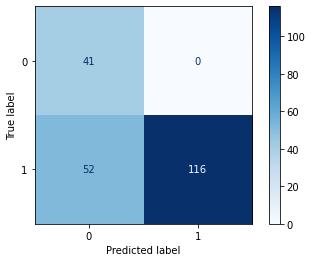

In [66]:
hgbrpmdl = HistGradientBoostingClassifier()
hgbrpmdl, hgbvalacc, hgbvalauc, hgbvalmae, hbgvalrmse, hbgvalexectim = execmod(hgbrpmdl, X_train_resampled, y_train_resampled, X_test, y_test)

Accuracy = 0.9138755980861244
ROC Area under Curve = 0.9464285714285714
MAE Value = 0.0861244019138756
RMSE Value = 0.2934695928267111
Execution Time = 0.20050501823425293
              precision    recall  f1-score   support

           0   0.694915  1.000000  0.820000        41
           1   1.000000  0.892857  0.943396       168

    accuracy                       0.913876       209
   macro avg   0.847458  0.946429  0.881698       209
weighted avg   0.940151  0.913876  0.919189       209



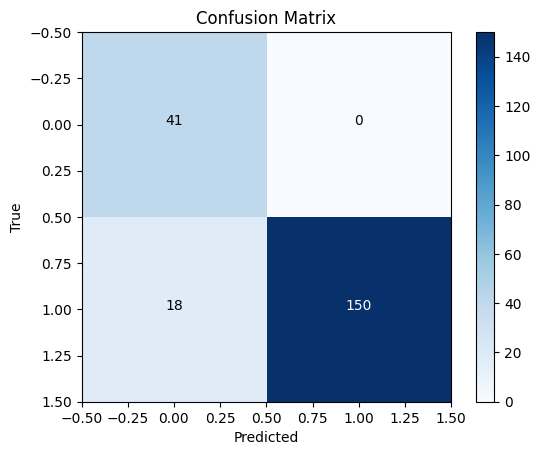

In [66]:
#Extra Trees Classifier
etcvalpara = {'n_estimators': 39,
              'max_depth': 1,
              'min_samples_split': 5,
              'random_state': 42}
    
etcrpmdl = ExtraTreesClassifier(**etcvalpara)
etcrpmdl, etcvalacc, etcvalauc, etcvalmae, etcvalrmse, etcvalexectim = execmod(etcrpmdl, X_train_resampled, y_train_resampled, X_test, y_test)

Accuracy = 0.7511961722488039
ROC Area under Curve = 0.8452380952380952
MAE Value = 0.24880382775119617
RMSE Value = 0.498802393489843
Execution Time = 0.39008569717407227
              precision    recall  f1-score   support

           0   0.440860  1.000000  0.611940        41
           1   1.000000  0.690476  0.816901       168

    accuracy                       0.751196       209
   macro avg   0.720430  0.845238  0.714421       209
weighted avg   0.890312  0.751196  0.776694       209



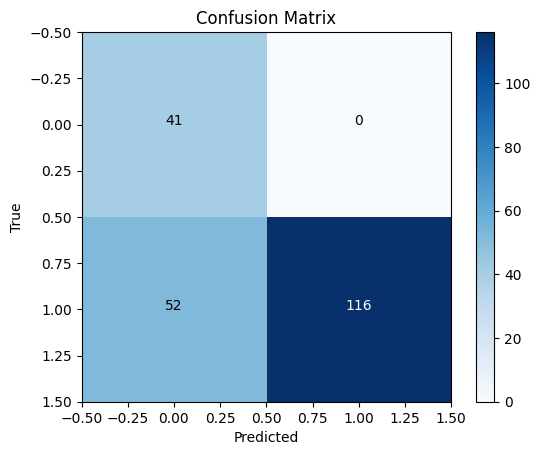

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
gbcrpmdl = GradientBoostingClassifier()
gbcrpmdl, gbcvalacc, gbcvalauc, gbcvalmae, gbcvalrmse, gbcvalexectim = execmod(gbcrpmdl, X_train_resampled, y_train_resampled, X_test, y_test)

Accuracy = 0.7511961722488039
ROC Area under Curve = 0.8452380952380952
MAE Value = 0.24880382775119617
RMSE Value = 0.498802393489843
Execution Time = 0.5000181198120117
              precision    recall  f1-score   support

           0   0.440860  1.000000  0.611940        41
           1   1.000000  0.690476  0.816901       168

    accuracy                       0.751196       209
   macro avg   0.720430  0.845238  0.714421       209
weighted avg   0.890312  0.751196  0.776694       209



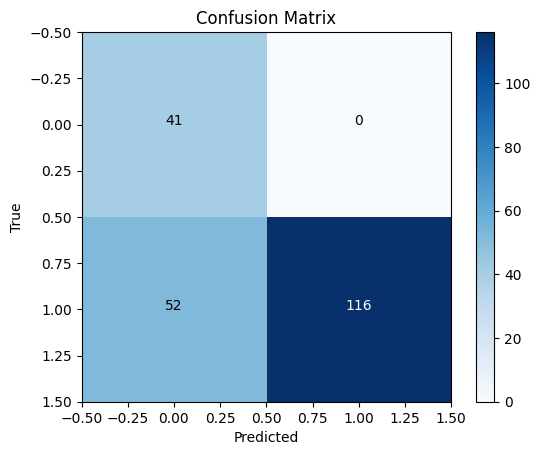

In [71]:
from lightgbm import LGBMClassifier

# Create an LGBM Classifier model
lgbrpmdl = LGBMClassifier()
lgbrpmdl, lgbvalacc, lgbvalauc, lgbvalmae, lgbvalrmse, lgbvalexectim = execmod(lgbrpmdl, X_train_resampled, y_train_resampled, X_test, y_test)

Accuracy = 0.8086124401913876
ROC Area under Curve = 0.8809523809523809
MAE Value = 0.19138755980861244
RMSE Value = 0.4374786392598071
Execution Time = 8.858504295349121
              precision    recall  f1-score   support

           0   0.506173  1.000000  0.672131        41
           1   1.000000  0.761905  0.864865       168

    accuracy                       0.808612       209
   macro avg   0.753086  0.880952  0.768498       209
weighted avg   0.903125  0.808612  0.827056       209



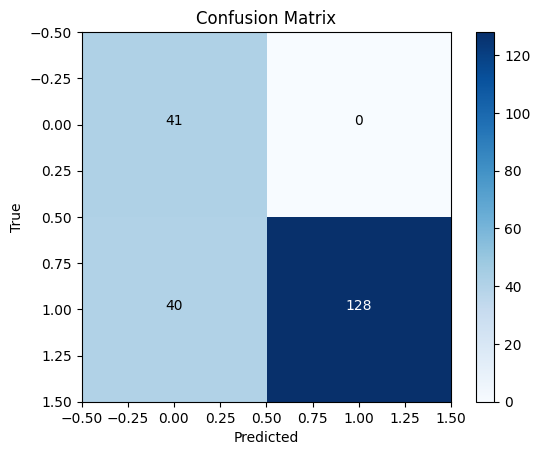

In [72]:
import catboost as cb
cbrpmdl = cb.CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose = False)
cbrpmdl, cbvalacc, cbvalauc, cbvalmae, cbvalrmse, cbvalexectim = execmod(cbrpmdl, X_train_resampled, y_train_resampled, X_test, y_test)

Accuracy = 0.7607655502392344
ROC Area under Curve = 0.8511904761904762
MAE Value = 0.23923444976076555
RMSE Value = 0.4891159880445185
Execution Time = 6.591963768005371
              precision    recall  f1-score   support

           0   0.450549  1.000000  0.621212        41
           1   1.000000  0.702381  0.825175       168

    accuracy                       0.760766       209
   macro avg   0.725275  0.851190  0.723193       209
weighted avg   0.892213  0.760766  0.785163       209



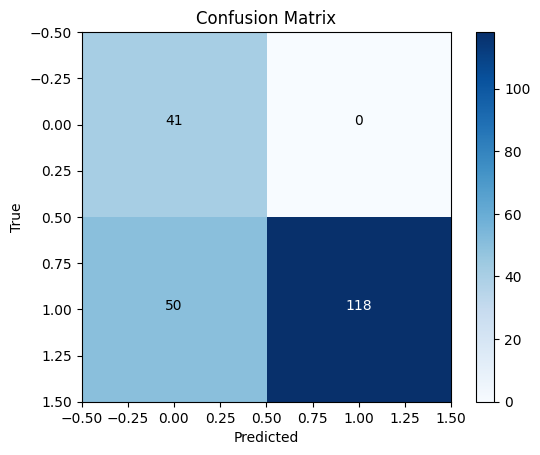

In [73]:
from sklearn.ensemble import VotingClassifier
vcrpmdl = VotingClassifier(estimators=[("random_forest", rfrpmdl),
                                     ("catboost", cbrpmdl),
                                     ("lgbm", lgbrpmdl)])
vcrpmdl, vcvalacc, vcvalauc, vcvalmae, vcvalrmse, vcvalexectim = execmod(vcrpmdl, X_train_resampled, y_train_resampled, X_test, y_test)

In [74]:
model = ['Logistic Regression', 'Random Forest Classifier', 'Extra Trees Classifier', 'Gradient Boosting Classifier', 'LightGBM Classifier', 'CatBoost Classifier', 'Voting Classifier']
accuracy = [logvalacc, rfvalacc, etcvalacc, gbcvalacc, lgbvalacc, cbvalacc, vcvalacc]
MAE = [logvalmae, rfvalmae, etcvalmae, gbcvalmae, lgbvalmae, cbvalmae, vcvalmae]
RMSE = [logvalrmse, rfvalrmse, etcvalrmse, gbcvalrmse, lgbvalrmse, cbvalrmse, vcvalrmse]
headers = ['Model', 'Accuracy', 'MAE', 'RMSE']
table_data = list(zip(model, accuracy, MAE, RMSE))
table = tabulate(table_data, headers=headers, floatfmt=".4f", tablefmt="fancy_grid")
print("Binary Classification Approach: \n")
print(table)

Binary Classification Approach: 

╒══════════════════════════════╤════════════╤════════╤════════╕
│ Model                        │   Accuracy │    MAE │   RMSE │
╞══════════════════════════════╪════════════╪════════╪════════╡
│ Logistic Regression          │     0.8278 │ 0.1722 │ 0.4150 │
├──────────────────────────────┼────────────┼────────┼────────┤
│ Random Forest Classifier     │     0.8373 │ 0.1627 │ 0.4033 │
├──────────────────────────────┼────────────┼────────┼────────┤
│ Extra Trees Classifier       │     0.9139 │ 0.0861 │ 0.2935 │
├──────────────────────────────┼────────────┼────────┼────────┤
│ Gradient Boosting Classifier │     0.7512 │ 0.2488 │ 0.4988 │
├──────────────────────────────┼────────────┼────────┼────────┤
│ LightGBM Classifier          │     0.7512 │ 0.2488 │ 0.4988 │
├──────────────────────────────┼────────────┼────────┼────────┤
│ CatBoost Classifier          │     0.8086 │ 0.1914 │ 0.4375 │
├──────────────────────────────┼────────────┼────────┼────────┤
│ Voti

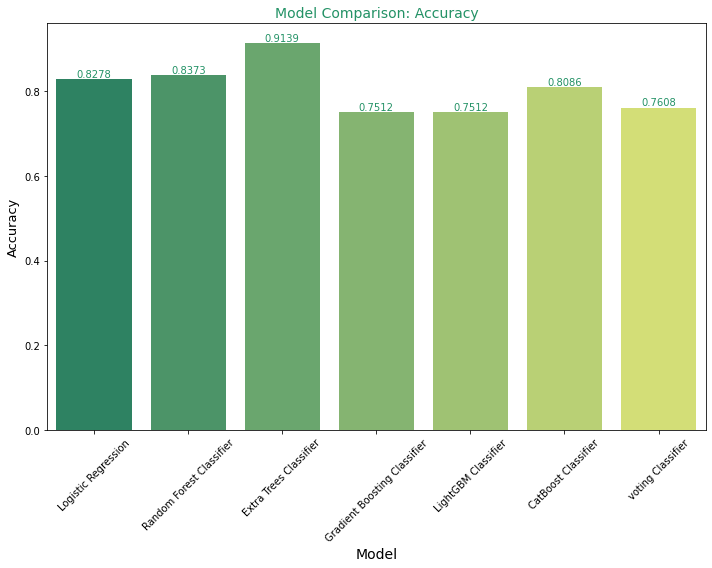

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define model names and accuracy values
model = ['Logistic Regression', 'Random Forest Classifier', 'Extra Trees Classifier', 'Gradient Boosting Classifier', 'LightGBM Classifier', 'CatBoost Classifier', 'voting Classifier']
accuracy_values = [logvalacc, rfvalacc, etcvalacc, gbcvalacc, lgbvalacc, cbvalacc, vcvalacc]

# Generate positions for the bars
x = np.arange(len(model))

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Model Comparison: Accuracy', fontsize=14, color=sns.color_palette('summer')[0])

# Use sns.barplot for accuracy with color palette
sns.barplot(x=x, y=accuracy_values, palette='summer', ax=ax)

# Set x-axis tick positions and labels
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(model, rotation=45)

# Add text labels to the bar plot
for i, j in zip(x, accuracy_values):
    ax.text(i, j, f'{j:.4f}', ha='center', va='bottom', color=sns.color_palette('summer')[0])

# Adjust the plot layout
fig.tight_layout()

# Show the plot
plt.show()


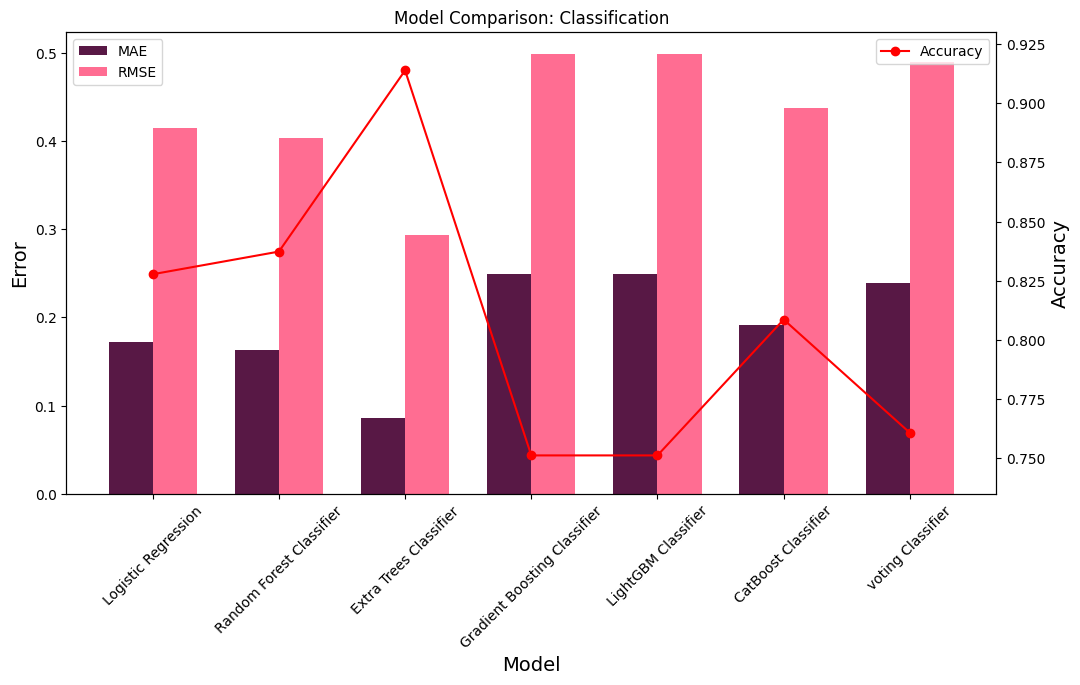

In [75]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Define the models and their positions on the x-axis
models = ['Logistic Regression', 'Random Forest Classifier', 'Extra Trees Classifier', 'Gradient Boosting Classifier', 'LightGBM Classifier', 'CatBoost Classifier', 'voting Classifier']
positions = np.arange(len(models))
accuracy = [logvalacc, rfvalacc, etcvalacc, gbcvalacc, lgbvalacc, cbvalacc, vcvalacc]
MAE = [logvalmae, rfvalmae, etcvalmae, gbcvalmae, lgbvalmae, cbvalmae, vcvalmae]
RMSE = [logvalrmse, rfvalrmse, etcvalrmse, gbcvalrmse, lgbvalrmse, cbvalrmse, vcvalrmse]

# Define the width of each bar
bar_width = 0.35

# Plot MAE
bar1 = plt.bar(positions - bar_width/2, MAE, width=bar_width, label='MAE', color='#581845')

# Plot RMSE
bar2 = plt.bar(positions + bar_width/2, RMSE, width=bar_width, label='RMSE', color=sns.color_palette('spring')[2])  #'#FF7F50'

# Set labels and title
plt.title('Model Comparison: Classification')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Error', fontsize=14)

# Set the x-axis tick positions and labels
plt.xticks(positions, models, rotation=45)

# Create a secondary axis for the line chart
ax2 = plt.twinx()
ax2.set_ylabel('Accuracy', fontsize=14)

# Plot accuracy as a line plot
line = ax2.plot(positions, accuracy, marker='o', color='red', label='Accuracy')

# Combine the bar and line legends
legend = plt.legend([bar1, bar2, line[0]], ['MAE', 'RMSE'], loc='upper left')

# Set the legend to be within the plot area
plt.gca().add_artist(legend)

# Adjust the position of the legends
plt.legend(loc='upper right')

# Increase the right margin to accommodate the legend
plt.margins(0.05, 0.1)

# Show the plot
plt.show()


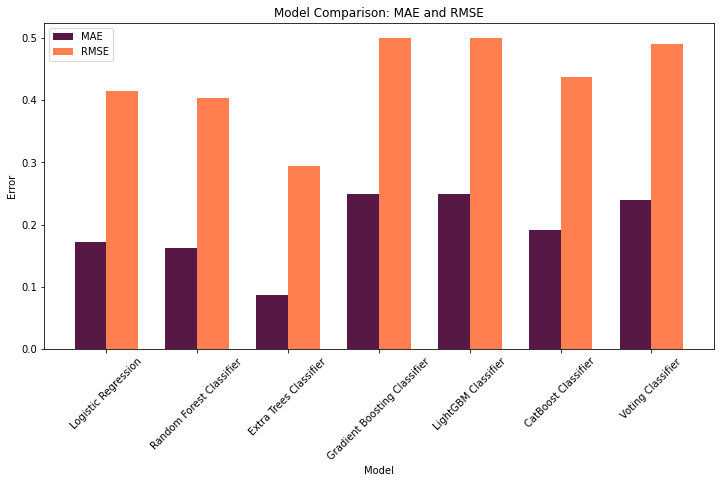

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Define the models and their positions on the x-axis
models = ['Logistic Regression', 'Random Forest Classifier', 'Extra Trees Classifier', 'Gradient Boosting Classifier', 'LightGBM Classifier', 'CatBoost Classifier', 'Voting Classifier']
positions = np.arange(len(models))

MAE = [logvalmae, rfvalmae, etcvalmae, gbcvalmae, lgbvalmae, cbvalmae, vcvalmae]
RMSE = [logvalrmse, rfvalrmse, etcvalrmse, gbcvalrmse, lgbvalrmse, cbvalrmse, vcvalrmse]

# Define the width of each bar
bar_width = 0.35

# Define unique colors for the bars
colors = ['#581845', '#FF7F50']

# Plot MAE
plt.bar(positions - bar_width/2, MAE, width=bar_width, label='MAE', color=colors[0])

# Plot RMSE
plt.bar(positions + bar_width/2, RMSE, width=bar_width, label='RMSE', color=colors[1])

# Set labels and title
plt.title('Model Comparison: MAE and RMSE')
plt.xlabel('Model')
plt.ylabel('Error')

# Set the x-axis tick positions and labels
plt.xticks(positions, models, rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [76]:
#Mixed Model
#0.9267, 0.9371, 0.9197, 0.9403, 0.9303, 0.9512

RanFacc = (0.9267 + 0.8373)/2 
ExtraTacc = (0.9371 + 0.9139)/2
GradBacc = (0.9197 + 0.7512)/2
LightBacc = (0.9403 + 0.7512)/2
CatBacc = (0.9303 + 0.8086)/2
Votacc = (0.9512 + 0.7608)/2

RanFmae = (0.7912 + 0.1627)/2 
ExtraTmae = (0.7774 + 0.0861)/2
GradBmae = (0.8771 + 0.2488)/2
LightBmae = (0.7205 + 0.2488)/2
CatBmae = (0.7584 + 0.1914)/2
Votmae = (0.6179 + 0.2392)/2

RanFrmse = (1.3797 + 0.4033)/2 
ExtraTrmse = (1.2781 + 0.2935)/2
GradBrmse = (1.4440 + 0.4988)/2
LightBrmse = (1.2451 + 0.4988)/2
CatBrmse = (1.2581 + 0.4375)/2
Votrmse = (1.1174 + 0.4891)/2

model1 = ['Random Forest', 'Extra Trees', 'Gradient Boosting', 'LightGBM', 'CatBoost', 'Voting']
Acc = [RanFacc, ExtraTacc, GradBacc, LightBacc, CatBacc, Votacc]
Mae = [RanFmae, ExtraTmae, GradBmae, LightBmae, CatBmae, Votmae]
Rmse = [RanFrmse, ExtraTrmse, GradBrmse, LightBrmse, CatBrmse, Votrmse]

#print("Mixed Model results (Classification & Regression): \n")
#print("The average accuracies for Mixed Model are, \n")

headers = ['Mixed Model', 'Accuracy', 'MAE', 'RMSE']
table_data = list(zip(model1, Acc, Mae, Rmse))
table = tabulate(table_data, headers=headers, floatfmt=".4f", tablefmt="fancy_grid")
print(table)

╒═══════════════════╤════════════╤════════╤════════╕
│ Mixed Model       │   Accuracy │    MAE │   RMSE │
╞═══════════════════╪════════════╪════════╪════════╡
│ Random Forest     │     0.8805 │ 0.4877 │ 0.9053 │
├───────────────────┼────────────┼────────┼────────┤
│ Extra Trees       │     0.9231 │ 0.4362 │ 0.8095 │
├───────────────────┼────────────┼────────┼────────┤
│ Gradient Boosting │     0.8350 │ 0.5632 │ 0.9755 │
├───────────────────┼────────────┼────────┼────────┤
│ LightGBM          │     0.8395 │ 0.5010 │ 0.9345 │
├───────────────────┼────────────┼────────┼────────┤
│ CatBoost          │     0.8688 │ 0.4961 │ 0.8978 │
├───────────────────┼────────────┼────────┼────────┤
│ Voting            │     0.8512 │ 0.4409 │ 0.8608 │
╘═══════════════════╧════════════╧════════╧════════╛


In [77]:
#Mixed Model
#0.8763, 0.8754, 0.9237, 0.9323, 0.9188, 0.9277, 0.9290, 0.9414

RanFacc = (0.9282 + 0.8373)/2 
ExtraTacc = (0.9372 + 0.9139)/2
GradBacc = (0.9207 + 0.7512)/2
LightBacc = (0.9468 + 0.7512)/2
CatBacc = (0.9342 + 0.8086)/2
Votacc = (0.9536 + 0.7608)/2

RanFmae = (0.8311 + 0.1627)/2 
ExtraTmae = (0.7823 + 0.0861)/2
GradBmae = (0.9166 + 0.2488)/2
LightBmae = (0.6817 + 0.2488)/2
CatBmae = (0.7832 + 0.1914)/2
Votmae = (0.5978 + 0.2392)/2

RanFrmse = (1.4208 + 0.4033)/2 
ExtraTrmse = (1.3288 + 0.2935)/2
GradBrmse = (1.4932 + 0.4988)/2
LightBrmse = (1.2235 + 0.4988)/2
CatBrmse = (1.3597 + 0.4375)/2
Votrmse = (1.1424 + 0.4891)/2

model1 = ['Random Forest', 'Extra Trees', 'Gradient Boosting', 'LightGBM', 'CatBoost', 'Voting']
Acc = [RanFacc, ExtraTacc, GradBacc, LightBacc, CatBacc, Votacc]
Mae = [RanFmae, ExtraTmae, GradBmae, LightBmae, CatBmae, Votmae]
Rmse = [RanFrmse, ExtraTrmse, GradBrmse, LightBrmse, CatBrmse, Votrmse]

#print("Mixed Model results (Classification & Regression): \n")
#print("The average accuracies for Mixed Model are, \n")

headers = ['Mixed Model', 'Accuracy', 'MAE', 'RMSE']
table_data = list(zip(model1, Acc, Mae, Rmse))
table = tabulate(table_data, headers=headers, floatfmt=".4f", tablefmt="fancy_grid")
print(table)

╒═══════════════════╤════════════╤════════╤════════╕
│ Mixed Model       │   Accuracy │    MAE │   RMSE │
╞═══════════════════╪════════════╪════════╪════════╡
│ Random Forest     │     0.8828 │ 0.4969 │ 0.9121 │
├───────────────────┼────────────┼────────┼────────┤
│ Extra Trees       │     0.9256 │ 0.4342 │ 0.8112 │
├───────────────────┼────────────┼────────┼────────┤
│ Gradient Boosting │     0.8359 │ 0.5827 │ 0.9960 │
├───────────────────┼────────────┼────────┼────────┤
│ LightGBM          │     0.8490 │ 0.4652 │ 0.8612 │
├───────────────────┼────────────┼────────┼────────┤
│ CatBoost          │     0.8714 │ 0.4873 │ 0.8986 │
├───────────────────┼────────────┼────────┼────────┤
│ Voting            │     0.8572 │ 0.4185 │ 0.8157 │
╘═══════════════════╧════════════╧════════╧════════╛


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define model names and accuracy values
model_names = results1.index.tolist()
accuracy_values = results1['r2'].values

# Generate positions for the bars
x = np.arange(len(model_names))

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Model Comparison: Accuracy', fontsize=14, color=sns.color_palette('summer')[0])

# Use sns.barplot for accuracy with color palette
sns.barplot(x=x, y=accuracy_values, palette='summer', ax=ax)

# Set x-axis tick positions and labels
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45)

# Add text labels to the bar plot
for i, j in zip(x, accuracy_values):
    ax.text(i, j, f'{j:.4f}', ha='center', va='bottom', color=sns.color_palette('summer')[0])

# Adjust the plot layout
fig.tight_layout()

# Show the plot
plt.show()